# *Model:* ARMA
# *Stock Data:* NSEI
#  *Name: *Abbas Amjherawala**

In [93]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from tqdm import tqdm
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta, timezone
from time import time

# **Import Data and calculate Returns**
> **plots:** *prices of stocks over time and returns of stocks over time*

In [94]:
tickerSymbol = '^NSEI'
data = yf.Ticker(tickerSymbol)
data

yfinance.Ticker object <^NSEI>

In [95]:
prices = data.history(start='2022-03-03', end='2023-03-03').Close
prices

Date
2022-03-03 00:00:00+05:30    16498.050781
2022-03-04 00:00:00+05:30    16245.349609
2022-03-07 00:00:00+05:30    15863.150391
2022-03-08 00:00:00+05:30    16013.450195
2022-03-09 00:00:00+05:30    16345.349609
                                 ...     
2023-02-24 00:00:00+05:30    17465.800781
2023-02-27 00:00:00+05:30    17392.699219
2023-02-28 00:00:00+05:30    17303.949219
2023-03-01 00:00:00+05:30    17450.900391
2023-03-02 00:00:00+05:30    17321.900391
Name: Close, Length: 250, dtype: float64

In [96]:
returns = prices.pct_change().dropna()
returns

Date
2022-03-04 00:00:00+05:30   -0.015317
2022-03-07 00:00:00+05:30   -0.023527
2022-03-08 00:00:00+05:30    0.009475
2022-03-09 00:00:00+05:30    0.020726
2022-03-10 00:00:00+05:30    0.015267
                               ...   
2023-02-24 00:00:00+05:30   -0.002595
2023-02-27 00:00:00+05:30   -0.004185
2023-02-28 00:00:00+05:30   -0.005103
2023-03-01 00:00:00+05:30    0.008492
2023-03-02 00:00:00+05:30   -0.007392
Name: Close, Length: 249, dtype: float64

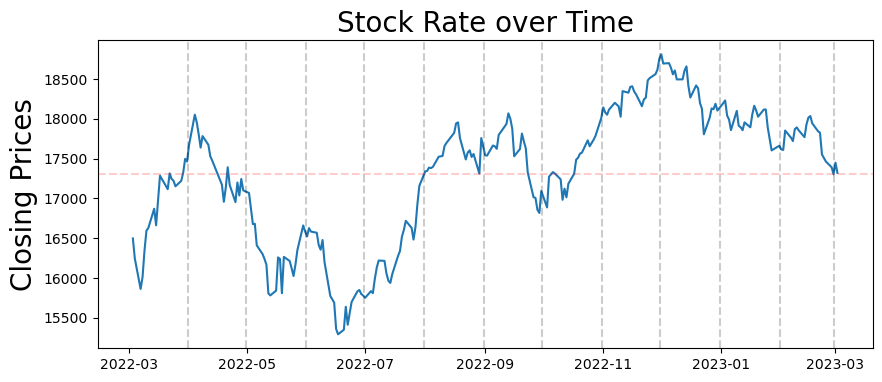

In [97]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Closing Prices', fontsize=20)
plt.title('Stock Rate over Time', fontsize=20)

dates = pd.date_range(start='2022-03-03', end='2023-03-03', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(prices.mean(), color='r', alpha=0.2, linestyle='--')

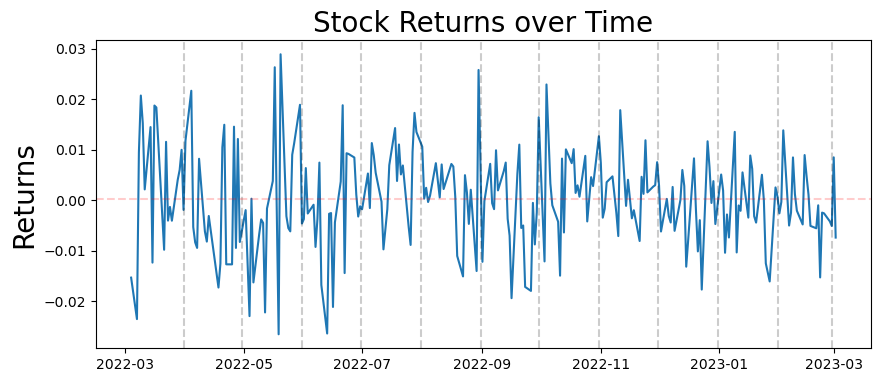

In [98]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns', fontsize=20)
plt.title('Stock Returns over Time', fontsize=20)

dates = pd.date_range(start='2022-03-03', end='2023-03-03', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(returns.mean(), color='r', alpha=0.2, linestyle='--')

# ACF for MA
> No proper identifications captured

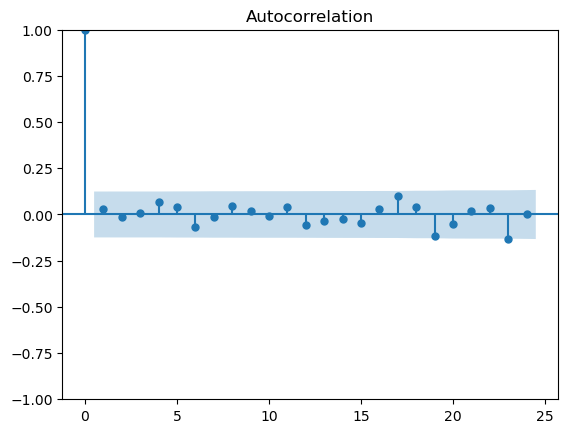

In [99]:
plot_acf(returns)
plt.show()

# PACF for AR
> No proper identification captured

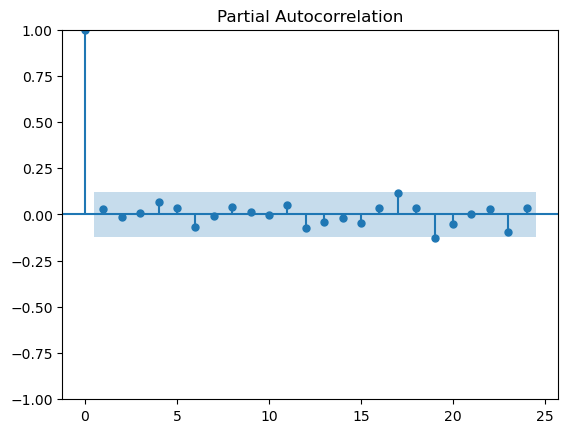

In [100]:
plot_pacf(returns, method='ywm')
plt.show()

# Train and Test data splits
1. divide price dataframe
2. train ARIMA model on train set
3. test order of ARIMA model among: (0,0,0), (4,0,4), (4,0,6) and (6,0,6)
4. predicting test data on ARIMA order (5,0,4), best
5. plotting original vs predicted data
6. calculating acuuracy: mae, mse, mape

In [101]:
p_train_date='2023-01-02'
p_train_data = prices[:p_train_date]
p_train_data.index = pd.to_datetime(p_train_data.index)
p_train_data

Date
2022-03-03 00:00:00+05:30    16498.050781
2022-03-04 00:00:00+05:30    16245.349609
2022-03-07 00:00:00+05:30    15863.150391
2022-03-08 00:00:00+05:30    16013.450195
2022-03-09 00:00:00+05:30    16345.349609
                                 ...     
2022-12-27 00:00:00+05:30    18132.300781
2022-12-28 00:00:00+05:30    18122.500000
2022-12-29 00:00:00+05:30    18191.000000
2022-12-30 00:00:00+05:30    18105.300781
2023-01-02 00:00:00+05:30    18197.449219
Name: Close, Length: 208, dtype: float64

In [102]:
p_test_date='2023-01-03'
p_test_data = prices[p_test_date :]
p_test_data.index = pd.to_datetime(p_test_data.index)
p_test_data

Date
2023-01-03 00:00:00+05:30    18232.550781
2023-01-04 00:00:00+05:30    18042.949219
2023-01-05 00:00:00+05:30    17992.150391
2023-01-06 00:00:00+05:30    17859.449219
2023-01-09 00:00:00+05:30    18101.199219
2023-01-10 00:00:00+05:30    17914.150391
2023-01-11 00:00:00+05:30    17895.699219
2023-01-12 00:00:00+05:30    17858.199219
2023-01-13 00:00:00+05:30    17956.599609
2023-01-16 00:00:00+05:30    17894.849609
2023-01-17 00:00:00+05:30    18053.300781
2023-01-18 00:00:00+05:30    18165.349609
2023-01-19 00:00:00+05:30    18107.849609
2023-01-20 00:00:00+05:30    18027.650391
2023-01-23 00:00:00+05:30    18118.550781
2023-01-24 00:00:00+05:30    18118.300781
2023-01-25 00:00:00+05:30    17891.949219
2023-01-27 00:00:00+05:30    17604.349609
2023-01-30 00:00:00+05:30    17648.949219
2023-01-31 00:00:00+05:30    17662.150391
2023-02-01 00:00:00+05:30    17616.300781
2023-02-02 00:00:00+05:30    17610.400391
2023-02-03 00:00:00+05:30    17854.050781
2023-02-06 00:00:00+05:30    

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
model = ARIMA(p_train_data, order=(0, 0, 0))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print("Predicted price for the 2023-01-03:", predicted_price)
print("Original price for the 2023-01-03:", p_test_data[0])
print("Difference between original and predicted price:", p_test_data[0] - predicted_price)

Predicted price for the 2023-01-03: 17204.45897981055
Original price for the 2023-01-03: 18232.55078125
Difference between original and predicted price: 1028.0918014394483


In [105]:
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  208
Model:                          ARIMA   Log Likelihood               -1705.504
Date:                Sat, 04 Mar 2023   AIC                           3415.007
Time:                        13:03:14   BIC                           3421.682
Sample:                             0   HQIC                          3417.706
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.72e+04     62.589    274.881      0.000    1.71e+04    1.73e+04
sigma2      7.758e+05   1.07e+05      7.263      0.000    5.66e+05    9.85e+05
Ljung-Box (L1) (Q):                 201.32   Jarque-

In [106]:
model = ARIMA(p_train_data, order=(4, 0, 4))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print("Predicted price for the 2023-01-03:", predicted_price)
print("Original price for the 2023-01-03:", p_test_data[0])
print("Difference between original and predicted price:", p_test_data[0] - predicted_price)

Predicted price for the 2023-01-03: 18192.11322150296
Original price for the 2023-01-03: 18232.55078125
Difference between original and predicted price: 40.437559747038904


In [107]:
model = ARIMA(p_train_data, order=(4, 0, 6))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print("Predicted price for the 2023-01-03:", predicted_price)
print("Original price for the 2023-01-03:", p_test_data[0])
print("Difference between original and predicted price:", p_test_data[0] - predicted_price)

Predicted price for the 2023-01-03: 18189.096132577906
Original price for the 2023-01-03: 18232.55078125
Difference between original and predicted price: 43.454648672093754


In [108]:
model = ARIMA(p_train_data, order=(6, 0, 6))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print("Predicted price for the 2023-01-03:", predicted_price)
print("Original price for the 2023-01-03:", p_test_data[0])
print("Difference between original and predicted price:", p_test_data[0] - predicted_price)

Predicted price for the 2023-01-03: 18184.791773403267
Original price for the 2023-01-03: 18232.55078125
Difference between original and predicted price: 47.75900784673286


In [109]:
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  208
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -1360.545
Date:                Sat, 04 Mar 2023   AIC                           2749.090
Time:                        13:03:18   BIC                           2795.815
Sample:                             0   HQIC                          2767.983
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.72e+04    472.968     36.376      0.000    1.63e+04    1.81e+04
ar.L1          1.8043      0.230      7.834      0.000       1.353       2.256
ar.L2         -1.7101      0.253     -6.770      0.0

In [110]:
i=0
total_profit=0
total_loss=0
predictions=[]
for check in p_test_data:
    model = ARIMA(p_train_data, order=(5, 0, 4))
    fitted = model.fit()

    next_day_price = fitted.forecast()
    predicted_price = next_day_price.values[0]
    print(f"Predicted price for the {i+1} day:", predicted_price)
    predictions.append(predicted_price)
    print(f"Original price for the {i+1} day:", check)
    pr_ls= check - predicted_price
    if pr_ls<0:
        print("Loss of:", abs(pr_ls))
        total_loss+=pr_ls
    elif pr_ls==0:
        print("No Profit and No Loss")
    else:
        print("Profit of:", abs(pr_ls))
        total_profit+=pr_ls
    print("\n")
    p_train_data.loc[len(p_train_data)+i] = p_test_data.values[i]
    i=i+1

Predicted price for the 1 day: 18182.879521343188
Original price for the 1 day: 18232.55078125
Profit of: 49.67125990681234


Predicted price for the 2 day: 18206.68568765759
Original price for the 2 day: 18042.94921875
Loss of: 163.7364689075912


Predicted price for the 3 day: 18017.093685944226
Original price for the 3 day: 17992.150390625
Loss of: 24.94329531922631


Predicted price for the 4 day: 17984.23160279342
Original price for the 4 day: 17859.44921875
Loss of: 124.78238404342119


Predicted price for the 5 day: 17854.562915720642
Original price for the 5 day: 18101.19921875
Profit of: 246.6363030293578


Predicted price for the 6 day: 18089.831674463043
Original price for the 6 day: 17914.150390625
Loss of: 175.68128383804287


Predicted price for the 7 day: 17875.245935994215
Original price for the 7 day: 17895.69921875
Profit of: 20.45328275578504


Predicted price for the 8 day: 17890.21201381449
Original price for the 8 day: 17858.19921875
Loss of: 32.01279506448918


P

In [111]:
print("From January to March")
print("total profit of Rs.",total_profit)
print("Total loss of Rs.",total_loss)

From January to March
total profit of Rs. 1929.0283467814334
Total loss of Rs. -2239.494293546999


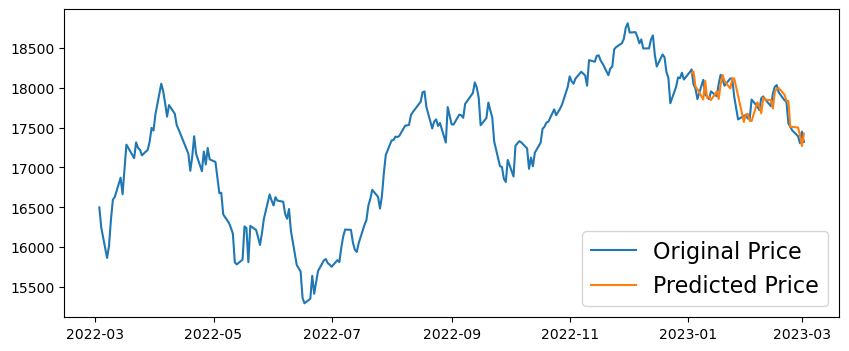

In [112]:
predict = pd.DataFrame(predictions, index=p_test_data.index)
plt.figure(figsize=(10,4))

plt.plot(prices)
plt.plot(predict)
plt.legend(('Original Price', 'Predicted Price'), fontsize=16)


In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [114]:
residuals = p_test_data - predictions
print("The accuracy of the ARIMA model for the test/train data is as stated as below:")
print('Mean Absolute Error:', mean_absolute_error(p_test_data, predictions))
print('Mean Squared Error:', mean_squared_error(p_test_data, predictions))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(p_test_data, predictions))

The accuracy of the ARIMA model for the test/train data is as stated as below:
Mean Absolute Error: 99.25053905543886
Mean Squared Error: 16574.490334278504
Root Mean Squared Error: 128.7419525029759
Mean Absolute Percentage Error: 0.005570384508734555


# Predicting Stck Price for tomorrow (04-03-2023) using ARIMA

In [115]:
import datetime
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)
prices = data.history(start=start_date, end=end_date).Close
prices

Date
2022-03-04 00:00:00+05:30    16245.349609
2022-03-07 00:00:00+05:30    15863.150391
2022-03-08 00:00:00+05:30    16013.450195
2022-03-09 00:00:00+05:30    16345.349609
2022-03-10 00:00:00+05:30    16594.900391
                                 ...     
2023-02-27 00:00:00+05:30    17392.699219
2023-02-28 00:00:00+05:30    17303.949219
2023-03-01 00:00:00+05:30    17450.900391
2023-03-02 00:00:00+05:30    17321.900391
2023-03-03 00:00:00+05:30    17594.349609
Name: Close, Length: 250, dtype: float64

In [116]:
model = ARIMA(prices, order=(0, 0, 0))
fitted = model.fit()

next_day_price = fitted.forecast()
predicted_price = next_day_price.values[0]
print(f"Predicted price for the {end_date}, i.e. tomorrow:", predicted_price)

Predicted price for the 2023-03-04, i.e. tomorrow: 17313.306989068737


# Function to Analyse Stock for average and deviation returns
> User Inputs:
* Provide start date input of the form: dd-mm-yyyy 
* Provide end date input of the form: dd-mm-yyyy 
* Provide Retrun Period Weeks
* Provide Minimum Avg Return
* Provide Maximum Deviation Return
* Calculate future price of stock using ARIMA 5,0,4

In [117]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader._utils import RemoteDataError

In [118]:
def plot_stock_trend_and_returns(prices, titles, start_date, end_date, all_returns):
    
    plt.figure(figsize=(10,6))
    
    plt.subplot(2,1,1)
    plt.plot(prices)
    plt.title(titles[0], fontsize=16)
    plt.ylabel('Price (Rs.)', fontsize=14)
    
    plt.subplot(2,1,2)
    plt.plot(all_returns[0], all_returns[1], color='g')
    plt.title(titles[1], fontsize=16)
    plt.ylabel('Return (Rs.)', fontsize=14)
    plt.axhline(0, color='k', linestyle='--')
    
    plt.tight_layout()
    plt.show()

In [119]:
def perform_analysis_for_stock(prices, start_date, end_date, return_period_weeks, verbose=False):    
    pct_return_after_period = []
    buy_dates = []

    for buy_date, buy_price in prices.iteritems():
        sell_date = buy_date + timedelta(weeks=return_period_weeks)
        
        try:
            sell_price = prices[prices.index == sell_date].iloc[0]
        except IndexError:
            continue
        
        pct_return = (sell_price - buy_price)/buy_price
        if pct_return>0:
            pct_return_after_period.append(pct_return)
            buy_dates.append(buy_date)
        
            if verbose:
                print('Date Buy: %s, Price Buy: %s'%(buy_date,round(buy_price,2)))
                print('Date Sell: %s, Price Sell: %s'%(sell_date,round(sell_price,2)))
                print('Return: %s%%'%round(pct_return*100,1))
                print('-------------------')
    
    if len(pct_return_after_period) == 0:
        return -np.inf, np.inf, None
    
    return np.mean(pct_return_after_period), np.std(pct_return_after_period), [buy_dates, pct_return_after_period]

In [120]:
from datetime import datetime

input_str=input("Provide start date input of the form: dd-mm-yyyy")
input_s_dt = datetime.strptime(input_str, '%d-%m-%Y')
input_str=input("Provide end date input of the form: dd-mm-yyyy")
input_e_dt = datetime.strptime(input_str, '%d-%m-%Y')
start_date, end_date = datetime(input_s_dt.year, input_s_dt.month, input_s_dt.day), datetime(input_e_dt.year, input_e_dt.month, input_e_dt.day)
return_period_weeks = int(input("Provide Retrun Period Weeks:"))
min_avg_return  = float(input("Provide Minimum Avg Return:"))
max_dev_return = float(input("Provide Maximum Deviation Return:"))

now = datetime.now()
if end_date > now:
    prices = data.history(start=start_date, end=now).Close
else: prices = data.history(start=start_date, end=end_date).Close
prices

Provide start date input of the form: dd-mm-yyyy 02-02-2023
Provide end date input of the form: dd-mm-yyyy 15-03-2023
Provide Retrun Period Weeks: 2
Provide Minimum Avg Return: 0.003
Provide Maximum Deviation Return: 0.8


Date
2023-02-02 00:00:00+05:30    17610.400391
2023-02-03 00:00:00+05:30    17854.050781
2023-02-06 00:00:00+05:30    17764.599609
2023-02-07 00:00:00+05:30    17721.500000
2023-02-08 00:00:00+05:30    17871.699219
2023-02-09 00:00:00+05:30    17893.449219
2023-02-10 00:00:00+05:30    17856.500000
2023-02-13 00:00:00+05:30    17770.900391
2023-02-14 00:00:00+05:30    17929.849609
2023-02-15 00:00:00+05:30    18015.849609
2023-02-16 00:00:00+05:30    18035.849609
2023-02-17 00:00:00+05:30    17944.199219
2023-02-20 00:00:00+05:30    17844.599609
2023-02-21 00:00:00+05:30    17826.699219
2023-02-22 00:00:00+05:30    17554.300781
2023-02-23 00:00:00+05:30    17511.250000
2023-02-24 00:00:00+05:30    17465.800781
2023-02-27 00:00:00+05:30    17392.699219
2023-02-28 00:00:00+05:30    17303.949219
2023-03-01 00:00:00+05:30    17450.900391
2023-03-02 00:00:00+05:30    17321.900391
2023-03-03 00:00:00+05:30    17594.349609
Name: Close, dtype: float64

In [121]:
import datetime
tz = 'Asia/Kolkata'
while now < end_date:
    model = ARIMA(prices, order=(5, 0, 4))
    fitted = model.fit()
    next_day_price = fitted.forecast()
    predicted_price = next_day_price.values[0]
    ts = pd.Timestamp(now).tz_localize('UTC').tz_convert(tz)
    new_data = pd.Series([predicted_price], index=[ts])
    prices = pd.concat([prices, new_data])
    now = now + datetime.timedelta(days=1)

Date Buy: 2023-02-02 00:00:00+05:30, Price Buy: 17610.4
Date Sell: 2023-02-16 00:00:00+05:30, Price Sell: 18035.85
Return: 2.4%
-------------------
Date Buy: 2023-02-03 00:00:00+05:30, Price Buy: 17854.05
Date Sell: 2023-02-17 00:00:00+05:30, Price Sell: 17944.2
Return: 0.5%
-------------------
Date Buy: 2023-02-06 00:00:00+05:30, Price Buy: 17764.6
Date Sell: 2023-02-20 00:00:00+05:30, Price Sell: 17844.6
Return: 0.5%
-------------------
Date Buy: 2023-02-07 00:00:00+05:30, Price Buy: 17721.5
Date Sell: 2023-02-21 00:00:00+05:30, Price Sell: 17826.7
Return: 0.6%
-------------------


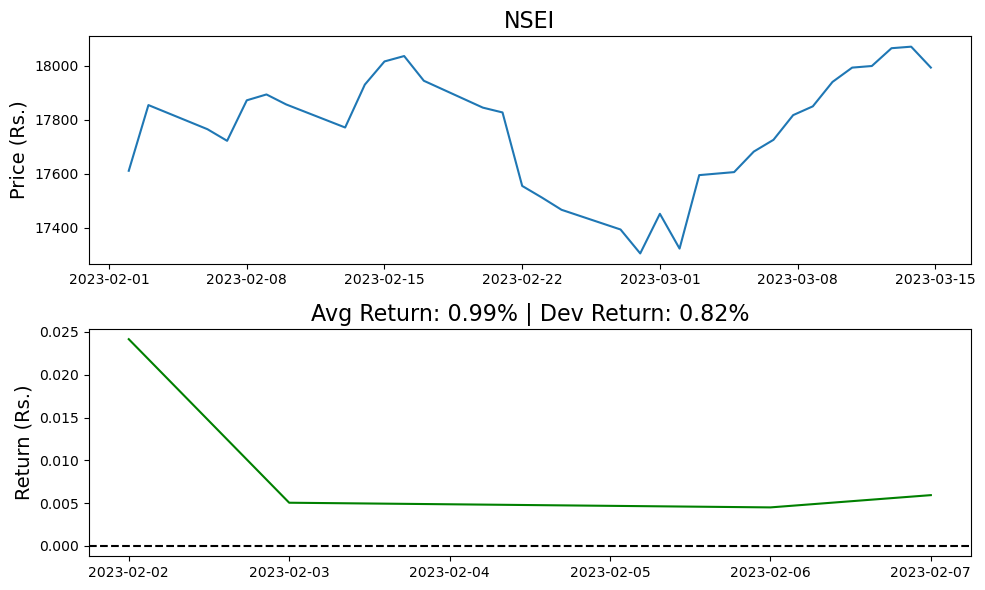

The Avg Return and Dev Return were High!


In [122]:
avg_return, dev_return, all_returns = perform_analysis_for_stock(prices, start_date, end_date, return_period_weeks,True)
title_price = 'NSEI'
title_return = 'Avg Return: %s%% | Dev Return: %s%%'%(round(100*avg_return,2), round(100*dev_return,2))
plot_stock_trend_and_returns(prices, [title_price, title_return], start_date, end_date, all_returns)
if avg_return > min_avg_return and dev_return < max_dev_return:
    print("The Avg Return and Dev Return were High!")
else:
    print("The Avg Return and Dev Return were too Low!")

# Function to simulate user amount and give return *based on user inputs*

In [123]:
def run_simulation(returns, prices, amt, thresh, order=(5,0,1), verbose=True, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt
    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        model = ARIMA(curr_data, order=order).fit()
        pred = model.forecast().values[0]

        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and pred > thresh:
            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)
                
    if verbose:
        print('Total Amount: $%s'%round(amt,2))
        
    #graph
    if plot:
        plt.figure(figsize=(10,4))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims), 
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%(tickerSymbol, thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()
    
    return amt

Provide start date input of the form: dd-mm-yyyy 02-02-2022
Provide end date input of the form: dd-mm-yyyy 02-03-2023
Provide Amount: 27
Provide Threshold: 0.0006


  0%|          | 1/254 [00:00<01:06,  3.80it/s]

Bought at $17063.25
Sold at $16247.9501953125
Predicted Return: 0.0074
Actual Return: -0.0478


  1%|          | 3/254 [00:00<00:51,  4.84it/s]

Bought at $16658.400390625
Sold at $16793.900390625
Predicted Return: 0.0089
Actual Return: 0.0081


  3%|▎         | 7/254 [00:01<01:07,  3.64it/s]

Bought at $16245.349609375
Sold at $15863.150390625
Predicted Return: 0.0054
Actual Return: -0.0235


  4%|▎         | 9/254 [00:02<00:56,  4.30it/s]

Bought at $16013.4501953125
Sold at $16345.349609375
Predicted Return: 0.0055
Actual Return: 0.0207


  8%|▊         | 20/254 [00:05<01:33,  2.51it/s]

Bought at $17222.75
Sold at $17153.0
Predicted Return: 0.005
Actual Return: -0.004


  9%|▊         | 22/254 [00:06<01:11,  3.23it/s]

Bought at $17222.0
Sold at $17325.30078125
Predicted Return: 0.0015
Actual Return: 0.006


 11%|█▏        | 29/254 [00:09<01:34,  2.39it/s]

Bought at $17807.650390625
Sold at $17639.55078125
Predicted Return: 0.0015
Actual Return: -0.0094


 12%|█▏        | 31/254 [00:09<01:12,  3.08it/s]

Bought at $17784.349609375
Sold at $17674.94921875
Predicted Return: 0.0052
Actual Return: -0.0062


 13%|█▎        | 33/254 [00:09<00:54,  4.05it/s]

Bought at $17530.30078125
Sold at $17475.650390625
Predicted Return: 0.0014
Actual Return: -0.0031


 14%|█▍        | 35/254 [00:10<00:51,  4.29it/s]

Bought at $17173.650390625
Sold at $16958.650390625
Predicted Return: 0.002
Actual Return: -0.0125


 17%|█▋        | 43/254 [00:12<00:41,  5.03it/s]

Bought at $17200.80078125
Sold at $17038.400390625
Predicted Return: 0.0009
Actual Return: -0.0094


 18%|█▊        | 45/254 [00:12<00:55,  3.75it/s]

Bought at $17069.099609375
Sold at $16677.599609375
Predicted Return: 0.0019
Actual Return: -0.0229


 19%|█▊        | 47/254 [00:13<00:54,  3.82it/s]

Bought at $16682.650390625
Sold at $16411.25
Predicted Return: 0.0027
Actual Return: -0.0163


 26%|██▌       | 66/254 [00:19<01:10,  2.68it/s]

Bought at $16522.75
Sold at $16628.0
Predicted Return: 0.0008
Actual Return: 0.0064


 27%|██▋       | 68/254 [00:20<00:58,  3.20it/s]

Bought at $16584.30078125
Sold at $16569.55078125
Predicted Return: 0.0012
Actual Return: -0.0009


 28%|██▊       | 71/254 [00:20<00:49,  3.72it/s]

Bought at $16356.25
Sold at $16478.099609375
Predicted Return: 0.0008
Actual Return: 0.0074


 29%|██▉       | 74/254 [00:21<00:45,  3.96it/s]

Bought at $15774.400390625
Sold at $15732.099609375
Predicted Return: 0.0021
Actual Return: -0.0027


 35%|███▍      | 88/254 [00:26<00:40,  4.08it/s]

Bought at $15799.099609375
Sold at $15780.25
Predicted Return: 0.0006
Actual Return: -0.0012


 37%|███▋      | 95/254 [00:28<00:43,  3.62it/s]

Bought at $16058.2998046875
Sold at $15966.650390625
Predicted Return: 0.0012
Actual Return: -0.0057


 42%|████▏     | 107/254 [00:31<00:24,  6.09it/s]

Bought at $16483.849609375
Sold at $16641.80078125
Predicted Return: 0.0011
Actual Return: 0.0096


 44%|████▍     | 112/254 [00:32<00:21,  6.46it/s]

Bought at $17345.44921875
Sold at $17388.150390625
Predicted Return: 0.0012
Actual Return: 0.0025
Bought at $17382.0
Sold at $17397.5
Predicted Return: 0.0011
Actual Return: 0.0009


 48%|████▊     | 121/254 [00:33<00:22,  5.95it/s]

Bought at $17758.44921875
Sold at $17490.69921875
Predicted Return: 0.0009
Actual Return: -0.0151


 48%|████▊     | 123/254 [00:33<00:21,  6.11it/s]

Bought at $17577.5
Sold at $17604.94921875
Predicted Return: 0.0012
Actual Return: 0.0016


 52%|█████▏    | 133/254 [00:36<00:20,  6.02it/s]

Bought at $17665.80078125
Sold at $17655.599609375
Predicted Return: 0.0006
Actual Return: -0.0006


 54%|█████▍    | 138/254 [00:37<00:35,  3.26it/s]

Bought at $18003.75
Sold at $17877.400390625
Predicted Return: 0.0006
Actual Return: -0.007


 55%|█████▌    | 140/254 [00:38<00:30,  3.79it/s]

Bought at $17530.849609375
Sold at $17622.25
Predicted Return: 0.0014
Actual Return: 0.0052


 57%|█████▋    | 145/254 [00:39<00:21,  5.06it/s]

Bought at $17327.349609375
Sold at $17016.30078125
Predicted Return: 0.0016
Actual Return: -0.018


 61%|██████    | 154/254 [00:42<00:35,  2.78it/s]

Bought at $17314.650390625
Sold at $17241.0
Predicted Return: 0.0009
Actual Return: -0.0043


 61%|██████▏   | 156/254 [00:42<00:25,  3.83it/s]

Bought at $16983.55078125
Sold at $17123.599609375
Predicted Return: 0.0017
Actual Return: 0.0082


 64%|██████▍   | 163/254 [00:44<00:27,  3.29it/s]

Bought at $17563.94921875
Sold at $17576.30078125
Predicted Return: 0.0008
Actual Return: 0.0007


 69%|██████▊   | 174/254 [00:46<00:14,  5.55it/s]

Bought at $18052.69921875
Sold at $18117.150390625
Predicted Return: 0.001
Actual Return: 0.0036


 72%|███████▏  | 183/254 [00:48<00:11,  6.26it/s]

Bought at $18343.900390625
Sold at $18307.650390625
Predicted Return: 0.0014
Actual Return: -0.002


 74%|███████▍  | 188/254 [00:49<00:15,  4.21it/s]

Bought at $18562.75
Sold at $18618.05078125
Predicted Return: 0.0006
Actual Return: 0.003


 75%|███████▍  | 190/254 [00:49<00:11,  5.47it/s]

Bought at $18758.349609375
Sold at $18812.5
Predicted Return: 0.0009
Actual Return: 0.0029


 76%|███████▋  | 194/254 [00:50<00:09,  6.63it/s]

Bought at $18696.099609375
Sold at $18701.05078125
Predicted Return: 0.0007
Actual Return: 0.0003
Bought at $18642.75
Sold at $18560.5
Predicted Return: 0.0008
Actual Return: -0.0044


 80%|███████▉  | 202/254 [00:52<00:10,  5.11it/s]

Bought at $18269.0
Sold at $18420.44921875
Predicted Return: 0.001
Actual Return: 0.0083


 81%|████████▏ | 207/254 [00:54<00:17,  2.65it/s]

Bought at $17806.80078125
Sold at $18014.599609375
Predicted Return: 0.0007
Actual Return: 0.0117


 84%|████████▍ | 214/254 [00:55<00:06,  5.86it/s]

Bought at $18105.30078125
Sold at $18197.44921875
Predicted Return: 0.0011
Actual Return: 0.0051


 87%|████████▋ | 222/254 [00:58<00:10,  3.03it/s]

Bought at $17956.599609375
Sold at $17894.849609375
Predicted Return: 0.0006
Actual Return: -0.0034


 90%|████████▉ | 228/254 [00:59<00:07,  3.28it/s]

Bought at $18118.55078125
Sold at $18118.30078125
Predicted Return: 0.0009
Actual Return: -0.0


 91%|█████████ | 231/254 [01:00<00:05,  3.86it/s]

Bought at $17604.349609375
Sold at $17648.94921875
Predicted Return: 0.0007
Actual Return: 0.0025


 97%|█████████▋| 247/254 [01:06<00:02,  2.41it/s]

Bought at $17844.599609375
Sold at $17826.69921875
Predicted Return: 0.0012
Actual Return: -0.001


100%|██████████| 254/254 [01:08<00:00,  3.73it/s]


Total Amount: $24.19


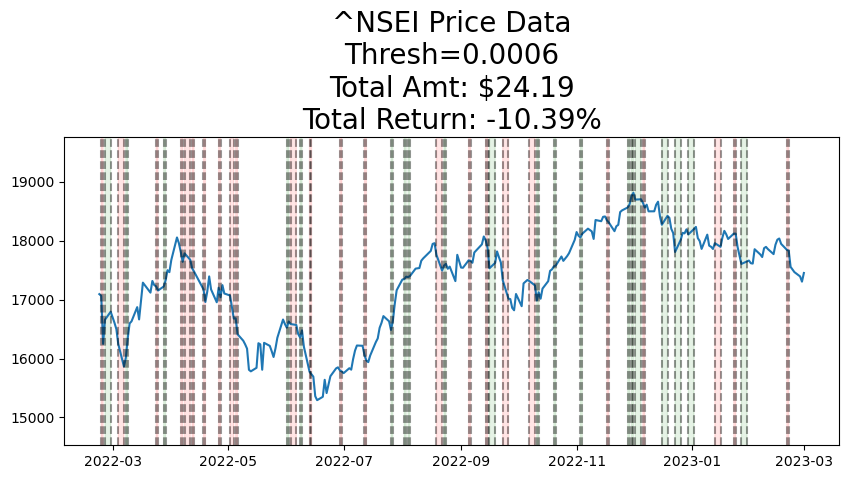

24.193406262567354

In [124]:
from datetime import datetime
input_str=input("Provide start date input of the form: dd-mm-yyyy")
input_s_dt = datetime.strptime(input_str, '%d-%m-%Y')
input_str=input("Provide end date input of the form: dd-mm-yyyy")
input_e_dt = datetime.strptime(input_str, '%d-%m-%Y')
start_date, end_date = datetime(input_s_dt.year, input_s_dt.month, input_s_dt.day), datetime(input_e_dt.year, input_e_dt.month, input_e_dt.day)
prices = data.history(start=start_date, end=end_date).Close

input_amt=float(input("Provide Amount:"))
input_th=float(input("Provide Threshold:"))
returns = prices.pct_change().dropna()
run_simulation(returns, prices, input_amt, input_th)